About the Project:
This project aims to Visualize Historical Weather Data. The best way to understand any particular problem is by analysing historical data. We have performed several Exploratory Data analyses (EDA) using Power BI which is a widely used Business Intelligence tool. After Performing EDA on Power BI many of the latent characteristics of the dataset have been discovered and now at this moment, we are moving forward with other analyses using Python.


In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot
import plotly.express as px
%matplotlib inline
import warnings
'''to clear the warning message'''
from sklearn.exceptions import ConvergenceWarning
# Filter the warning message
warnings.filterwarnings("ignore", category=FutureWarning)
# Disable convergence warning messages
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Disable Deprecatio warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

Importing the Dataset

In [2]:
data= pd.read_excel("/content/temp_humid_data_one.xlsx")
data.head()

,time,temperature_mean,relativehumidity_mean
0,2022-01-01,11.22,77
1,2022-01-02,9.87,86
2,2022-01-03,9.33,79
3,2022-01-04,11.05,72
4,2022-01-05,10.17,73


In [3]:
dataset= pd.read_excel("/content/temp_humid_data_one.xlsx")
dataset.head()

,time,temperature_mean,relativehumidity_mean
0,2022-01-01,11.22,77
1,2022-01-02,9.87,86
2,2022-01-03,9.33,79
3,2022-01-04,11.05,72
4,2022-01-05,10.17,73


In [ ]:
# covertion of time to date-time object
dataset["time"] = pd.to_datetime(dataset["time"]) #changing time to date-time format
#dataset["month"] = dataset["time"].dt.strftime('%B')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   365 non-null    datetime64[ns]
 1   temperature_mean       365 non-null    float64       
 2   relativehumidity_mean  365 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


Data Preprocessing
In the data preprocessing steps we are going to perform several steps to prepare a clean dataset for further analysis

Checking the Missing Values
The below plot shows whether is there any missing values present in the dataset in either of the columns. As per the plot we can visualize that there is no missing values present in the Dataset.

In [ ]:
null_values = dataset.isnull().sum()
print(null_values)

time                     0
temperature_mean         0
relativehumidity_mean    0
dtype: int64


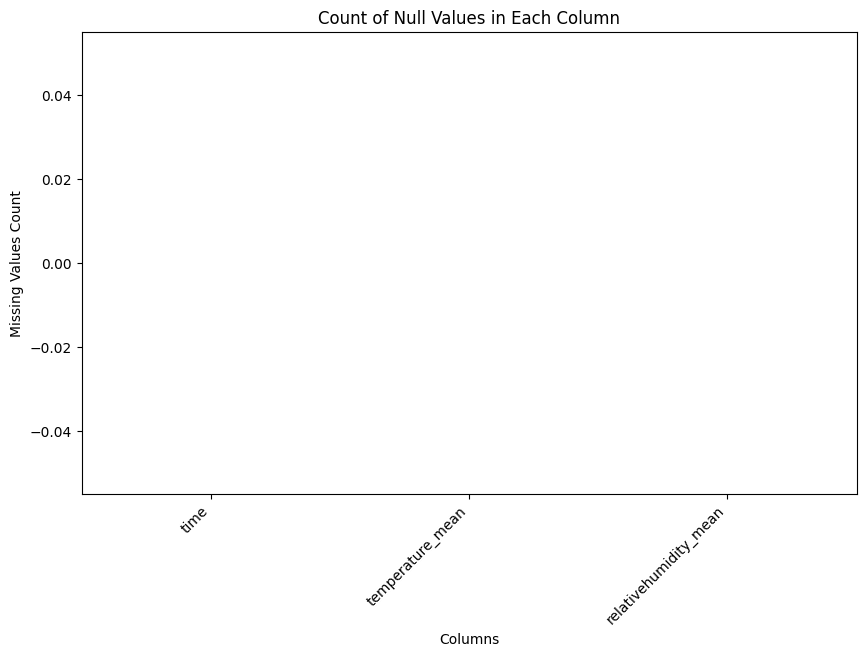

In [ ]:
plt.figure(figsize=(10, 6))
null_values.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Checking for Duplicates Values
It's also necessary to check for any duplicate entries in the dataset. The duplicate entries will cause redundency so it's better to remove duplicates from the dataset.

In [ ]:
# Identify duplicate rows
duplicates = dataset[dataset.duplicated(keep=False)]

# Print the duplicate rows
if len(duplicates) > 0:
    print('Duplicate Rows:')
    print(duplicates)
else:
    print('No duplicates found.')

print("Total Duplicate Entries: ", len(duplicates))

No duplicates found.
Total Duplicate Entries:  0


In the dataset there are no duplicate entries.

Normality Check:
We can also check the distribution of different features as well as perform normality check to understand whether the features are normally distributed or not.

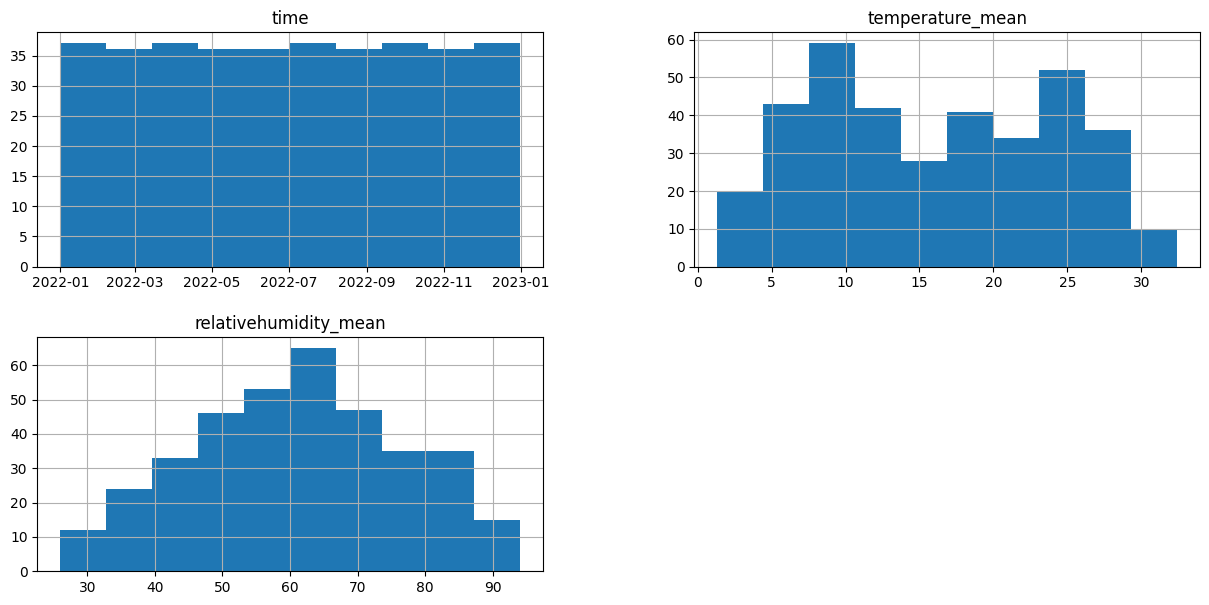

In [ ]:
dataset.hist(figsize=(15,7))
plt.show()

It seems like relative humidity is normally distributed on the other hand some sort of skewness present in mean temperature. We can also statistically prove the normality by performing Shapiro-Wilk test and check the value of Skewness and Kurtosis.

Feature: temperature_mean


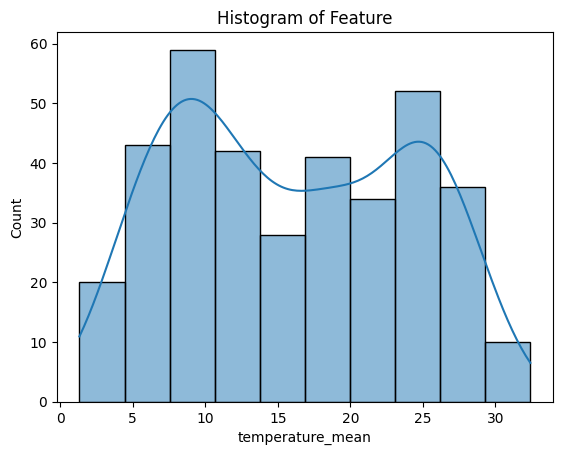

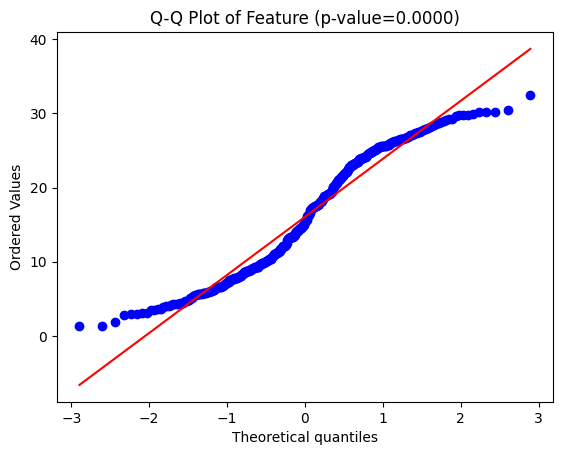

Skewness: 0.09612072714203977 Kurtosis: -1.26635976920458
Shapiro-Wilk test for normality: p-value=0.0000
Feature: relativehumidity_mean


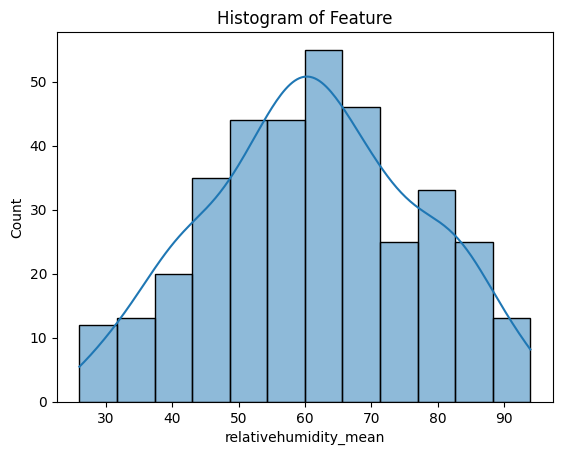

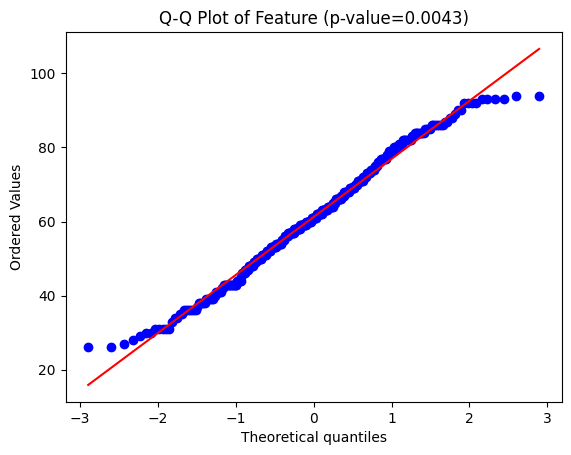

Skewness: -0.011113697393478646 Kurtosis: -0.6384664282700006
Shapiro-Wilk test for normality: p-value=0.0043


In [ ]:
# Get the list of numeric feature names
numeric_features = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Loop over each numeric feature and check its normality
for feature_name in numeric_features:
    print(f"Feature: {feature_name}")

    # Create a histogram of the feature
    sns.histplot(dataset[feature_name], kde=True)
    plt.title('Histogram of Feature')
    plt.show()

    # Create a Q-Q plot of the feature
    fig, ax = plt.subplots()
    stats_prob_plot = shapiro(dataset[feature_name])
    probplot(dataset[feature_name], plot=ax)
    ax.set_title(f'Q-Q Plot of Feature (p-value={stats_prob_plot[1]:.4f})')
    plt.show()

    # Check the skewness and kurtosis of the feature
    print(f"Skewness: {dataset[feature_name].skew()} Kurtosis: {dataset[feature_name].kurtosis()}")

    # Perform the Shapiro-Wilk test for normality
    stat, p = shapiro(dataset[feature_name])
    print(f"Shapiro-Wilk test for normality: p-value={p:.4f}")

Analysis of the Normality Check (Shapiro-Wilk test for normality):

We have performed Shapiro-Wilk test for normality check where the Null hypothesis is that one feature is normally distributate and the alternate hypothesis is that the feature is no normally distributed. If the p value is less than 0.05 then we can reject the null hypothesis and can conclude that the feature does not follow normality.

From the above figure we have see 3 statistical values. Skewness, Kurtosis and p-value of the Shapiro-wilk test for normality.

Feature Name	Skewness	Kurtosis	Shapiro-Wilk test (p-value)
Mean Temperature	0.096	-1.2	0.0000
Mean Humidity	-0.011	-0.638	0.0043
Skewness: Skewness is a measure of the asymmetry of the distribution. It quantifies the degree to which the distribution is skewed to the left or the right. A positive skewness value indicates that the tail of the distribution is longer on the right side, while a negative skewness value indicates that the tail is longer on the left side. When the skewness value is close to zero, the distribution is approximately symmetric.

Kurtosis: It is a measure of the "peakedness" of the distribution. It quantifies the degree to which the distribution is concentrated around the mean. A high kurtosis value indicates that the distribution has more values in the tails and fewer values in the center, while a low kurtosis value indicates that the distribution has more values in the center and fewer values in the tails. A kurtosis value of 3 is usually considered as the reference value for a normal distribution.

After checking the statistics it's clear that none of the features are normally distributed.

How to Handle this not normal features:

We can perform different transformation like log transformation to make the features normally distributed, but it may affect the performance of the model. There are some model where there is a strong assumptions about the normally on the contrary there are also several models which can handle features which are not normally distributed. So, we will not perform any transformation and continue with this features only.

Checking correlation among features
Checking correlation among features involves examining the extent to which the different independent variables in a dataset are related to each other. Correlation is a statistical measure that quantifies the degree of association between two variables, and it ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

When building a predictive model, it is important to check for correlation among the independent variables because highly correlated variables can lead to problems such as multicollinearity, which can affect the stability and reliability of the model's coefficients. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to determine the individual effect of each variable on the dependent variable.

In [ ]:
# Create correlation matrix
corr = dataset.corr()

# Create heatmap using Plotly
fig = px.imshow(corr,
                color_continuous_scale='RdBu',
                title='Correlation Matrix Heatmap',
                labels=dict(x='Features', y='Features', color='Correlation'),
                width=850, height=800)

# Show plot
fig.show()

From the correlation heatmap we can visualize that there is a strong negative correlation of -0.57 present between the mean and humidity feature.

Checking Outliers:
Outliers are data points that significantly deviate from the majority of the observations in a dataset. They are observations that are unusually distant from other data points and may indicate errors, anomalies, or special circumstances within the data. So, it is necessary to check the presence of outliers in different features.

In [ ]:
# Ensure numeric columns for the box plot
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Create a box plot using Plotly
fig = px.box(dataset, y=numeric_columns.columns)

# Update layout for better readability
fig.update_layout(
    title="Box Plot of Numeric Columns",
    yaxis_title="Values",
    font=dict(size=12),
    margin=dict(l=40, r=40, t=60, b=40)
)

# Update the layout to make the plot smaller
fig.update_layout(width=900, height=500)
# Display the plot
fig.show()

From the above boxplot which uses quartile method to check for any possible outliers, we can visualize that the features are not having potential outliers.

Splitting the Date Feature to (Month, Day, Year)
We can convert date column to any other format. To understand the significant of date we have decided to split the date to Month, Year, Day.

In [ ]:
data_date_splitted= dataset.copy() #copying the dataset to data_date_splitted
# Convert the 'Date' column to datetime
data_date_splitted['Date'] = pd.to_datetime(data_date_splitted['time'], format='%Y-%m-%d')
# Extract year, month, day, hour, minute, and second
data_date_splitted['Year'] = data_date_splitted['Date'].dt.year
data_date_splitted['Month'] = data_date_splitted['Date'].dt.month
data_date_splitted['Day'] = data_date_splitted['Date'].dt.day

data_date_splitted.head()

,time,temperature_mean,relativehumidity_mean,Date,Year,Month,Day
0,2022-01-01,11.22,77,2022-01-01,2022,1,1
1,2022-01-02,9.87,86,2022-01-02,2022,1,2
2,2022-01-03,9.33,79,2022-01-03,2022,1,3
3,2022-01-04,11.05,72,2022-01-04,2022,1,4
4,2022-01-05,10.17,73,2022-01-05,2022,1,5


Time Series Analysis
Now in this section we will try to perform Several Time Series Analysis on each and every variable to find different pattern or trend in the features which might be useful in building the model. We have already performed most of the necessary EDA using Power BI. Alongside we will just perform a few more here with python to understand more about the dataset.

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objs as go
from plotly.subplots import make_subplots
df_new=dataset.copy()
# Assuming your DataFrame has a 'Date' column with daily values (no specific time within each day)
df_new['time'] = pd.to_datetime(df_new['time'])

# Set 'Date' column as the index
df_new.set_index('time', inplace=True)

# Perform seasonal decomposition
result_new = seasonal_decompose(df_new['temperature_mean'])

# Create subplots
fig_new = make_subplots(rows=4, cols=1)

# Add trace for original signal
fig_new.add_trace(go.Scatter(x=df_new.index, y=df_new['temperature_mean'], name='Original Signal'), row=1, col=1)

# Add trace for trend component
fig_new.add_trace(go.Scatter(x=result_new.trend.index, y=result_new.trend.values, name='Trend'), row=2, col=1)

# Add trace for seasonal component
fig_new.add_trace(go.Scatter(x=result_new.seasonal.index, y=result_new.seasonal.values, name='Seasonal'), row=3, col=1)

# Add trace for residual component
fig_new.add_trace(go.Scatter(x=result_new.resid.index, y=result_new.resid.values, name='Residual'), row=4, col=1)

# Update layout to display x-axis labels only on the bottom subplot
fig_new.update_layout(xaxis=dict(showticklabels=False), xaxis4=dict(showticklabels=True), title_text="Seasonal Decomposition of Mean Temperature")

# Update the layout to make the plot smaller
fig_new.update_layout(width=900, height=500)

# Display the plot
fig_new.show()


From the seasonal decomposition plot we can visualize the seasonal trend and seasonality present in the temperature feature. Trend: From Januray to july there is a upward trend whereas from august to december beginning there is a downward trend.

Seasonality: The temperature changes over every months.

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objs as go
from plotly.subplots import make_subplots
df_new_humidity=dataset.copy()
# Assuming your DataFrame has a 'Date' column with daily values (no specific time within each day)
df_new_humidity['time'] = pd.to_datetime(df_new_humidity['time'])

# Set 'Date' column as the index
df_new_humidity.set_index('time', inplace=True)

# Perform seasonal decomposition
result_new = seasonal_decompose(df_new_humidity['relativehumidity_mean'])

# Create subplots
fig_new = make_subplots(rows=4, cols=1)

# Add trace for original signal
fig_new.add_trace(go.Scatter(x=df_new.index, y=df_new_humidity['relativehumidity_mean'], name='Original Signal'), row=1, col=1)

# Add trace for trend component
fig_new.add_trace(go.Scatter(x=result_new.trend.index, y=result_new.trend.values, name='Trend'), row=2, col=1)

# Add trace for seasonal component
fig_new.add_trace(go.Scatter(x=result_new.seasonal.index, y=result_new.seasonal.values, name='Seasonal'), row=3, col=1)

# Add trace for residual component
fig_new.add_trace(go.Scatter(x=result_new.resid.index, y=result_new.resid.values, name='Residual'), row=4, col=1)

# Update layout to display x-axis labels only on the bottom subplot
fig_new.update_layout(xaxis=dict(showticklabels=False), xaxis4=dict(showticklabels=True), title_text="Seasonal Decomposition of Relative Mean Humidity")

# Update the layout to make the plot smaller
fig_new.update_layout(width=900, height=500)

# Display the plot
fig_new.show()

From the seasonal decomposition plot we can visualize the seasonal trend and seasonality present in the humidity feature. Trend: From Januray to july there is a downward trend whereas from august to december beginning there is a upward trend.

Seasonality: The temperature changes over every months.

Checking whether the features are stationary or not
Initilly we need to understand what stationary and non-stationary means. In general if data changes over time meaning there is a dependecy of data over time it is called non-stationary data on the contrary stationary data means that does not change over time.

There are three basic criterion for a time series to understand whether it is stationary series or not. Statistical properties of time series such as mean, variance should remain constant over time to call time series is stationary. So the conditions are as follows:

constant mean
constant variance
autocovariance that does not depend on time. autocovariance is covariance between time series and lagged time series.

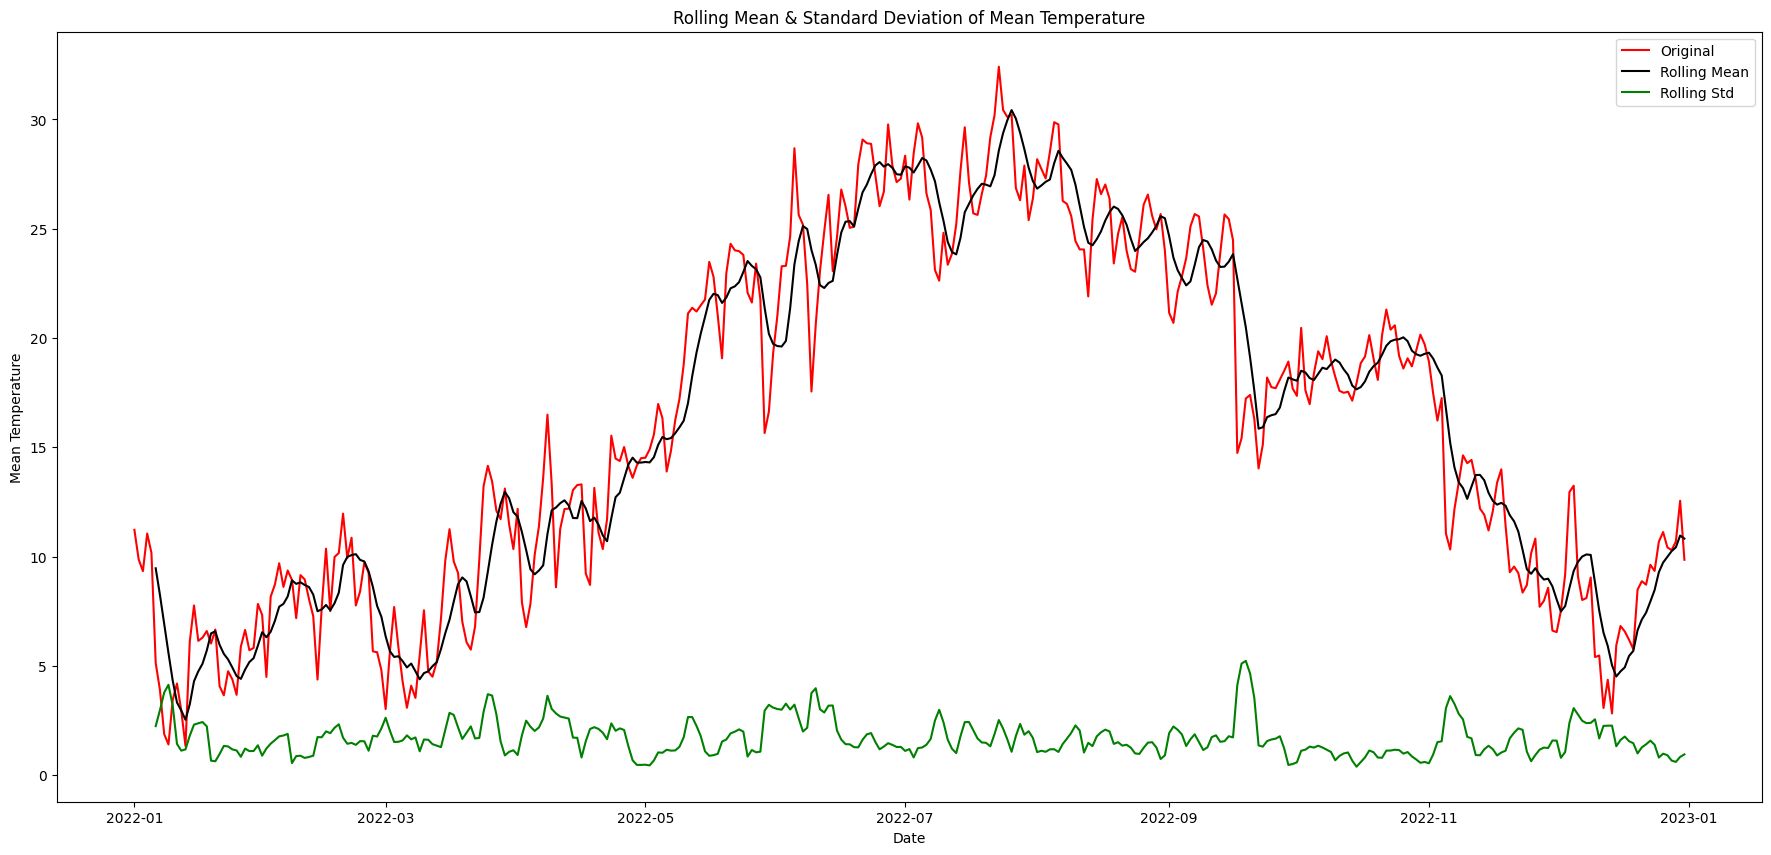

In [ ]:
# check_mean_std
def check_mean_std(ts):
    # Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()

    plt.figure(figsize=(22,10))
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation of Mean Temperature')
    plt.legend()
    plt.show()

# check stationary: mean, variance(std) and adfuller test
check_mean_std(df_new['temperature_mean'])

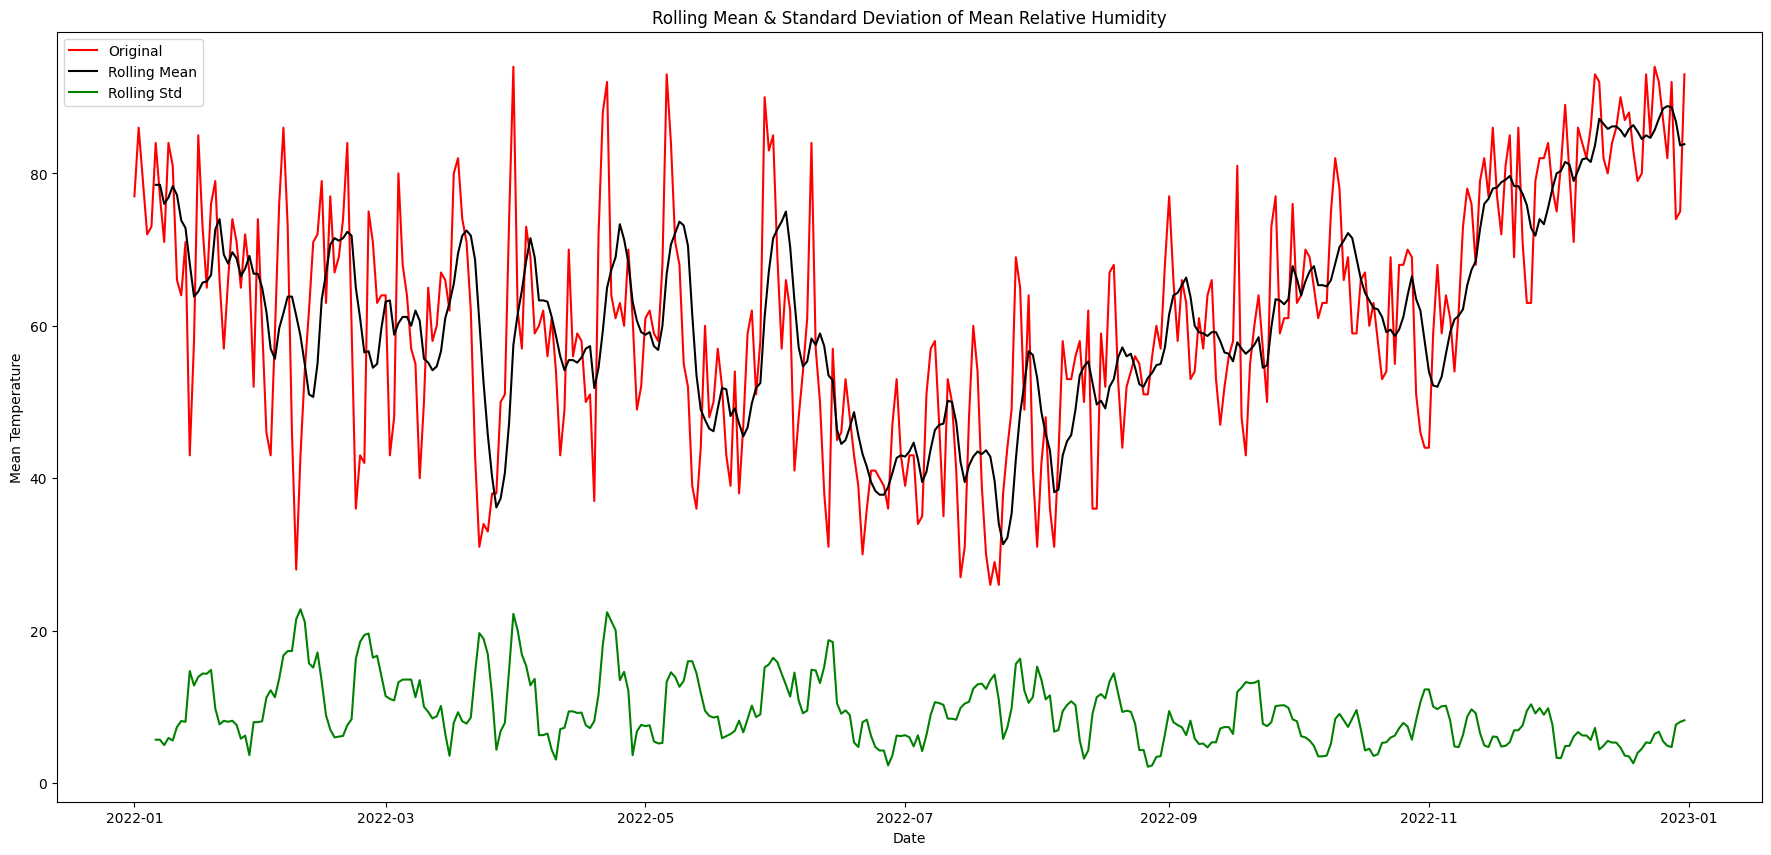

In [ ]:
# check_mean_std
def check_mean_std(ts):
    # Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()

    plt.figure(figsize=(22,10))
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation of Mean Relative Humidity')
    plt.legend()
    plt.show()

# check stationary: mean, variance(std) and adfuller test
check_mean_std(df_new_humidity['relativehumidity_mean'])

The ADF (Augmented Dickey-Fuller) test:
Initilly we need to understand what stationary and non-stationary means. In general if data changes over time meaning there is a dependecy of data over time it is called non-stationary data on the contrary stationary data means that does not change over time.

The ADF (Augmented Dickey-Fuller) test is a statistical test used to determine whether a time series is stationary or not. The ADF test uses a null hypothesis that the time series is non-stationary. The alternative hypothesis is that the time series is stationary.

In [ ]:
df_new

,temperature_mean,relativehumidity_mean
time,,
2022-01-01,11.22,77
2022-01-02,9.87,86
2022-01-03,9.33,79
2022-01-04,11.05,72
2022-01-05,10.17,73
...,...,...
2022-12-27,10.42,82
2022-12-28,10.29,92
2022-12-29,10.69,74


In [ ]:
from statsmodels.tsa.stattools import adfuller
columns=["temperature_mean","relativehumidity_mean"]
# Loop through each column in the DataFrame
for col in columns:
    # Perform the ADF test on the column
    result = adfuller(df_new[col])

    # Extract the p-value from the test result
    p_value = result[1]

    # Check if the p-value is less than the significance level (e.g. 0.05)
    if p_value < 0.05:
        print(col, "is stationary (p-value: %f)" % p_value)
    else:
        print(col, "is non-stationary (p-value: %f)" % p_value)


temperature_mean is non-stationary (p-value: 0.610895)
relativehumidity_mean is non-stationary (p-value: 0.516041)


From the ADF test and visulizations, it can be stated that both temperature and humidity features are non-stationary.

Granger causality tests
Using grangercausalitytests function we can check does temperature has any casual effect with humidity.

The basic idea behind Granger causality is that if a variable X Granger-causes another variable Y, then past values of X should contain information that helps predict Y.

From this test it is clearly visible that both features are not having casual effects.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Select all available features except for nest_weight
features = [col for col in df_new.columns if col != 'temperature_mean']

# Loop through each feature and run the Granger causality test
for feat in features:
    results = grangercausalitytests(df_new[['temperature_mean', feat]], maxlag=3, verbose=False)
    p_value = results[3][0]['params_ftest'][1]

    if p_value < 0.05:
        print("There is Granger causality between %s and temperature_mean (p-value: %f)" % (feat, p_value))
    else:
        print("There is no Granger causality between %s and temperature_mean (p-value: %f)" % (feat, p_value))

There is no Granger causality between relativehumidity_mean and temperature_mean (p-value: 0.688754)


Univariate Time Series Forecasting:
Forcasting Mean Temperature:
Here as per the Granger causality test there is no Granger causality between relativehumidity_mean and temperature_mean which means the past values of one feature will not help to predict the future value of another feature. For this reason we are decided to continue with Univariate Time Series Forecasting instead of multivariate forecasting.

But the correlation between temperature and humidity is a measure of the linear relationship between the two variables. A negative correlation of -0.5 suggests that as one variable (e.g., temperature) increases, the other variable (humidity) tends to decrease, and vice versa.

So Initially we will start will Univariate Time series forecasting after that we will move to multivariate one like VAR Model.

In [ ]:
df_temperature=df_new.drop('relativehumidity_mean', axis=1)

In [ ]:
df_temperature

,temperature_mean
time,
2022-01-01,11.22
2022-01-02,9.87
2022-01-03,9.33
2022-01-04,11.05
2022-01-05,10.17
...,...
2022-12-27,10.42
2022-12-28,10.29
2022-12-29,10.69


Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF) to select p, d and q:
The ACF measures the correlation between a time series and its own lagged values. It helps identify the presence of any correlation or patterns in the data at different lags. The ACF is defined as the correlation coefficient between the time series and its lagged values at various time intervals.

The PACF measures the correlation between a time series and its own lagged values, excluding the contributions from the intermediate lags. It helps identify the direct relationship between the observations at different lags, removing the effects of intervening lags.

p: Here p is the number of autoregressor lag to include in the model. It means how many past values should be considered to make a future prediction. In general PACF is used to select the AR value.
d: It is the degree of differencing. It is used to remove the trend or seasonality in the feature. In general, ARIMA model works best on stationary data.
q: Number of moving average lags. It is the forecast error. When the model make any forecast there will be some residuals. This dedices how many residual terms to be included in the model. In general ACF is used to select MA value.

Checking ACF and PACF of original feature¶

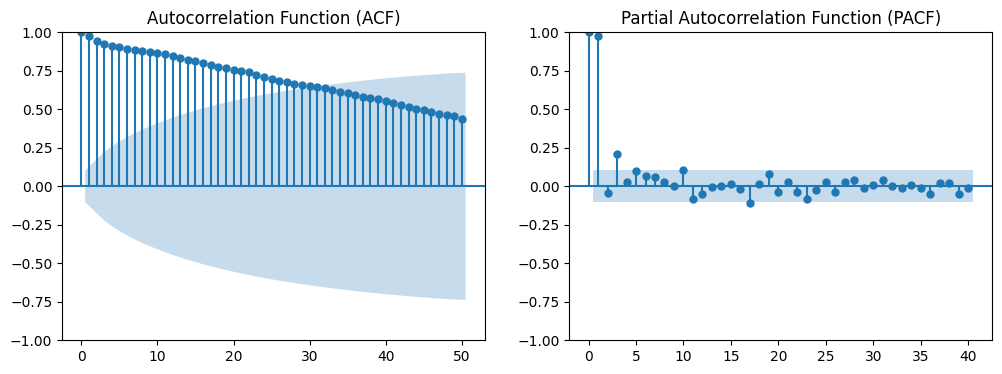

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.tools import diff



# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# ACF Plot
plot_acf(df_temperature, lags=50, ax=ax[0], title='Autocorrelation Function (ACF)')

# PACF Plot
plot_pacf(df_temperature, lags=40, ax=ax[1], title='Partial Autocorrelation Function (PACF)')

plt.show()

1st order differencing to make the mean stationary¶

Text(0.5, 1.0, 'Mean Temperature over time after 1st order differencing ')

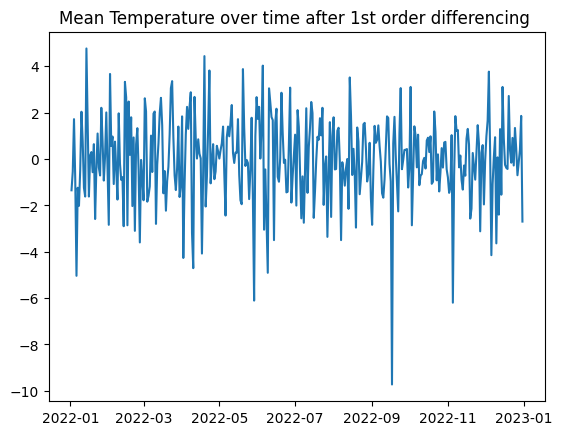

In [ ]:
df_temperature_stationary= diff(df_temperature,k_diff=1) #1st order differencing

plt.plot(df_temperature_stationary)
plt.title("Mean Temperature over time after 1st order differencing ")


Checking ACF and PACF of stationary feature

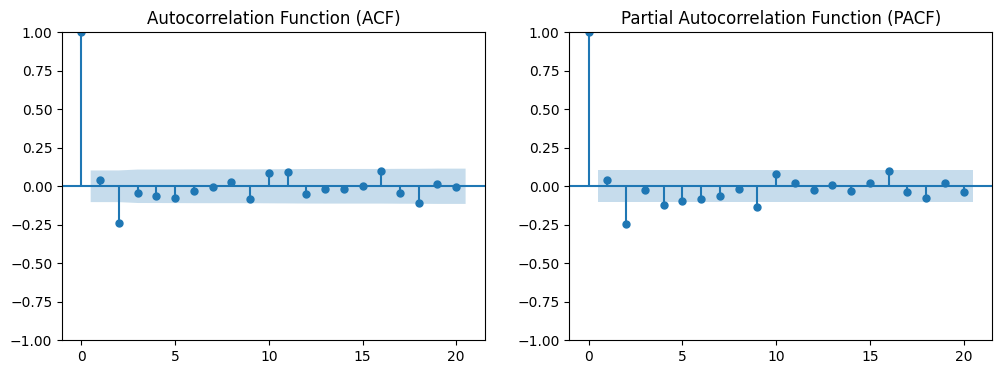

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.tools import diff


# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# ACF Plot
plot_acf(df_temperature_stationary, lags=20, ax=ax[0], title='Autocorrelation Function (ACF)')

# PACF Plot
plot_pacf(df_temperature_stationary, lags=20, ax=ax[1], title='Partial Autocorrelation Function (PACF)')

plt.show()

Both ACF and PACF follows a geometric pattern.

From the ACF and PACF we can visualize that the differencing was too aggressive or not effective in making the series stationary and makes the data as random noise. Based on this we will select p=1, d=0, q=1.



Selecting the Optimal Value of (p,d,q) using AUTO-ARIMA to Forecast Mean Temperature
In general, autoarima model perform automatic serach to find the optimal values of p,d and q by minimizing the value of AIC. Here sometimes intercept term is also added. If the values of a feature are considered that they are having zero mean and stationary then it is not added other wise this intercept is added.

The main goal of this auto-arima is to reduce Akaike Information Criterion (AIC). In simple terms AIC works on two main principles:

A good model should fit the data well, meaning that it should accurately capture the patterns and structure in the data.
A good model should be as simple as possible, meaning that it should use the minimum number of parameters necessary to explain the data.
Based on this the autoarima model we will find the optimal values of p,q and d.

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

model = pm.auto_arima(df_temperature, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                       max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1466.537, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1471.347, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1472.809, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1472.312, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1469.349, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1446.808, Time=1.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1452.689, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1446.240, Time=2.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1454.450, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1450.452, Time=4.77 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1443.943, Time=1.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1442.541, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1447.582, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1444.026, Time=1.66 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept

Based on autoarima we are getting optimal p,d,q as follows:

Best model: ARIMA(1,1,2)(0,0,0)[0]

But as we have already seen 1st order differencing was too aggressive for the feature so we will continue with p=1, d=0 and q=1 to implement the arima model.

ARIMA Model
An ARIMA (AutoRegressive Integrated Moving Average) model is a widely used statistical method for time series forecasting. It combines autoregression (AR), differencing (I), and moving average (MA) components to model and predict future values of a time series.

We are going to select AR=1, I=0 and MA=1.

Splitting the dataset into train and test set

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Create Training and Test
train = dataset[:300]
test = dataset[300:]

Building the model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



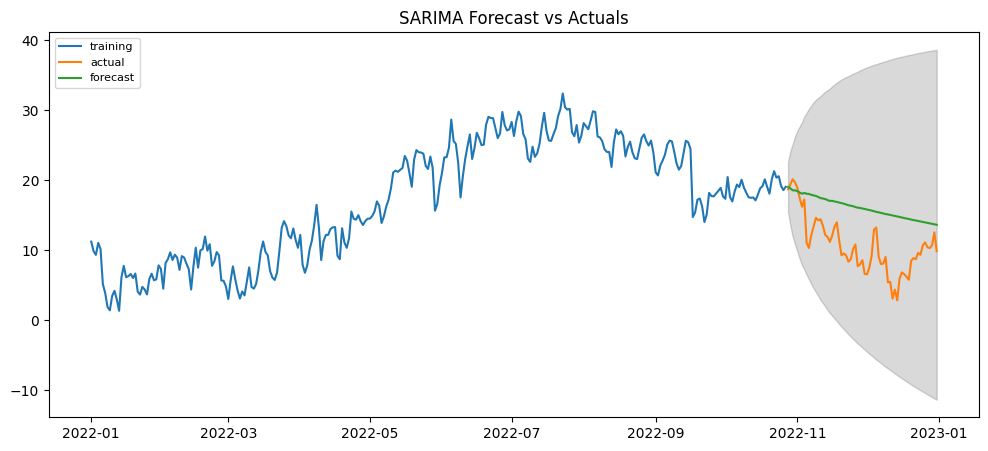

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
order = (1, 0, 1)        # non-seasonal order (p, d, q)
seasonal_order = (1, 0, 1, 12)  # seasonal order (P, D, Q, s)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
fitted = model.fit()

# Forecast
forecast_steps = len(test)
fc = fitted.get_forecast(steps=forecast_steps, alpha=0.05)  # 95% conf

# Extract forecasted values and confidence intervals
fc_values = fc.predicted_mean
conf_int = fc.conf_int()

# Make as pandas series
fc_series = pd.Series(fc_values, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('SARIMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Model Performance Analysis

In [ ]:
# Accuracy Metrics
from sklearn.metrics import  mean_squared_error
import math

mse = mean_squared_error(test, fc_values)
rmse = math.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 39.01923213065743
RMSE: 6.24653761140181


SARIMAX Model
SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous factors) is an extension of the ARIMA model that includes additional parameters to account for seasonality and exogenous variables.

Building the model

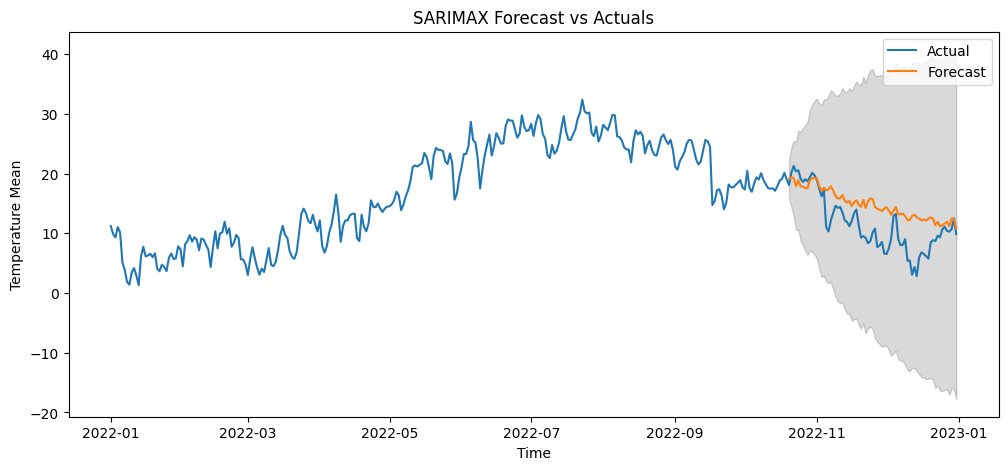

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Split data into train and test sets (assuming 80% train, 20% test)
train = data.iloc[:int(0.8*len(data))]
test = data.iloc[int(0.8*len(data)):]

# Fit SARIMAX model with exogenous variable
order = (1, 0, 1)  # non-seasonal order (p, d, q)
seasonal_order = (1, 0, 1, 12)  # seasonal order (P, D, Q, s)
model = SARIMAX(train['temperature_mean'], exog=train[['relativehumidity_mean']], order=order, seasonal_order=seasonal_order)
fitted = model.fit()

# Forecast on test set
forecast_steps = len(test)
exog_test = test[['relativehumidity_mean']]
fc = fitted.get_forecast(steps=forecast_steps, exog=exog_test, alpha=0.05)  # 95% confidence interval

# Extract forecasted values and confidence intervals
fc_values = fc.predicted_mean
conf_int = fc.conf_int()



# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(data['time'], data['temperature_mean'], label='Actual')
plt.plot(test['time'], fc_values, label='Forecast')
plt.fill_between(test['time'], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.15)
plt.xlabel('Time')
plt.ylabel('Temperature Mean')
plt.title('SARIMAX Forecast vs Actuals')
plt.legend()
plt.show()


Model Performance Analysis

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['temperature_mean'], fc_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Squared Error (MSE): 19.72129549883865
Root Mean Squared Error (RMSE): 4.440866525672512


Multivariate Time Series Forecasting:
VAR
A vector autoregressor (VAR) is a type of statistical model used for analyzing and forecasting multivariate time series data. In a VAR model, each variable in the time series is modeled as a linear function of its own lagged values as well as the lagged values of the other variables in the system.

In other words, a VAR model is a system of equations where each equation represents a variable in the time series. The coefficients of the equations represent the relationships between the variables, and the lagged values of the variables are used to capture the dynamic dependencies between them

Here in the var model we need to decide the order meaning how many lags we want to include in the model to perform future forecasting. It's similar to the concept of AR (p) which we have already computed during the development of ARIMA Model. We we are going to choose order=1 here to build VAR model.



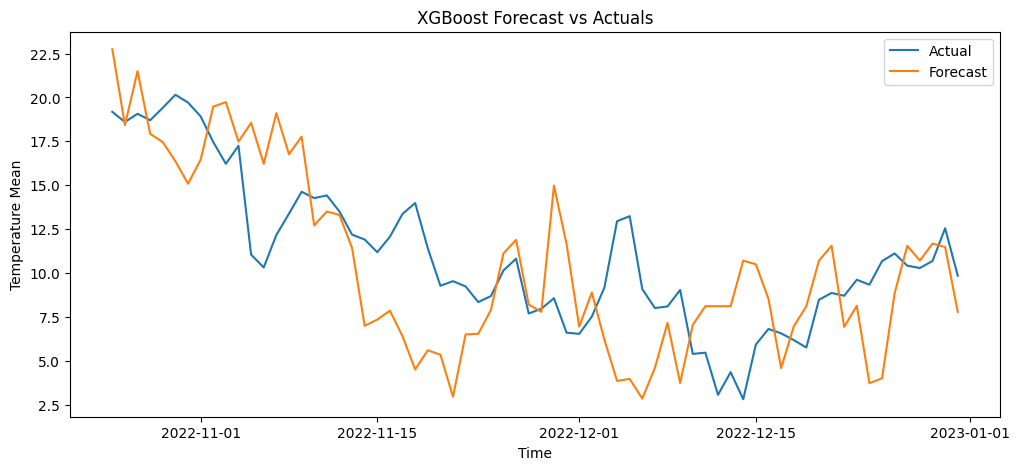

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load your data
# For example:
# data = pd.read_csv("your_data.csv")

# Assuming data has columns 'time', 'relativehumidity_mean', 'temperature_mean'

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Split data into train and test sets (assuming 80% train, 20% test)
train = data.iloc[:int(0.8*len(data))]
test = data.iloc[int(0.8*len(data)):]

# Scale the data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
train_scaled = scaler_x.fit_transform(train[['relativehumidity_mean']])
train_scaled = np.concatenate((train_scaled, scaler_y.fit_transform(train[['temperature_mean']])), axis=1)
test_scaled = scaler_x.transform(test[['relativehumidity_mean']])
test_scaled = np.concatenate((test_scaled, scaler_y.transform(test[['temperature_mean']])), axis=1)

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

seq_length = 5  # Sequence length
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Reshape the data for XGBoost
X_train_xgb = np.reshape(X_train, (X_train.shape[0], -1))
X_test_xgb = np.reshape(X_test, (X_test.shape[0], -1))

# Set XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model
num_rounds = 50
xgb_model = xgb.XGBRegressor(**params)
xgb_model.fit(X_train_xgb, y_train)

# Make predictions
y_pred_scaled = xgb_model.predict(X_test_xgb)

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(test['time'].iloc[seq_length:], test['temperature_mean'].iloc[seq_length:], label='Actual')
plt.plot(test['time'].iloc[seq_length:], y_pred, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Temperature Mean')
plt.title('XGBoost Forecast vs Actuals')
plt.legend()
plt.show()


Mean Squared Error (MSE): 21.933701711724844
Root Mean Squared Error (RMSE): 4.683343005986733


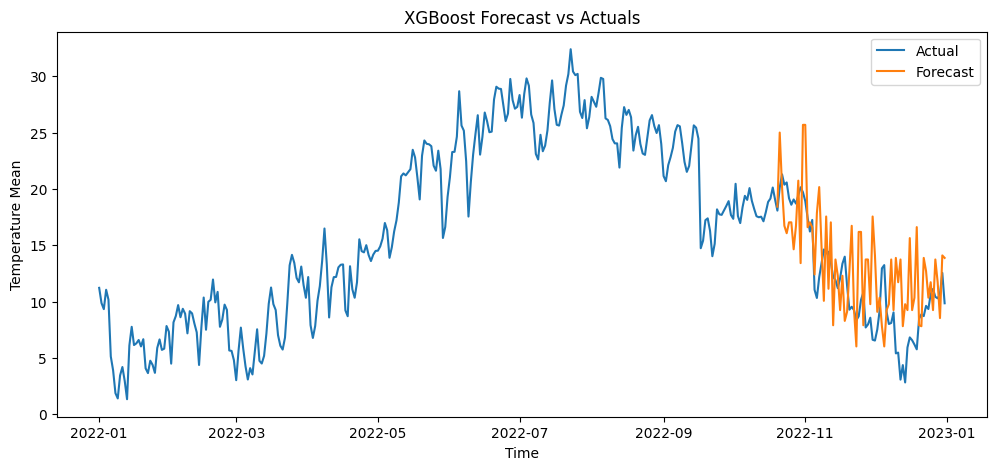

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Split data into train and test sets (assuming 80% train, 20% test)
train = data.iloc[:int(0.8*len(data))]
test = data.iloc[int(0.8*len(data)):]

# Define features and target variable
X_train = train[['relativehumidity_mean']]
y_train = train['temperature_mean']
X_test = test[['relativehumidity_mean']]
y_test = test['temperature_mean']

# Initialize and fit XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Forecast on test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(data['time'], data['temperature_mean'], label='Actual')
plt.plot(test['time'], y_pred, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Temperature Mean')
plt.title('XGBoost Forecast vs Actuals')
plt.legend()
plt.show()


Mean Squared Error (MSE) for XGBoost forecast: 177.5633458708883
Root Mean Squared Error (RMSE) for XGBoost forecast: 13.325289710579966


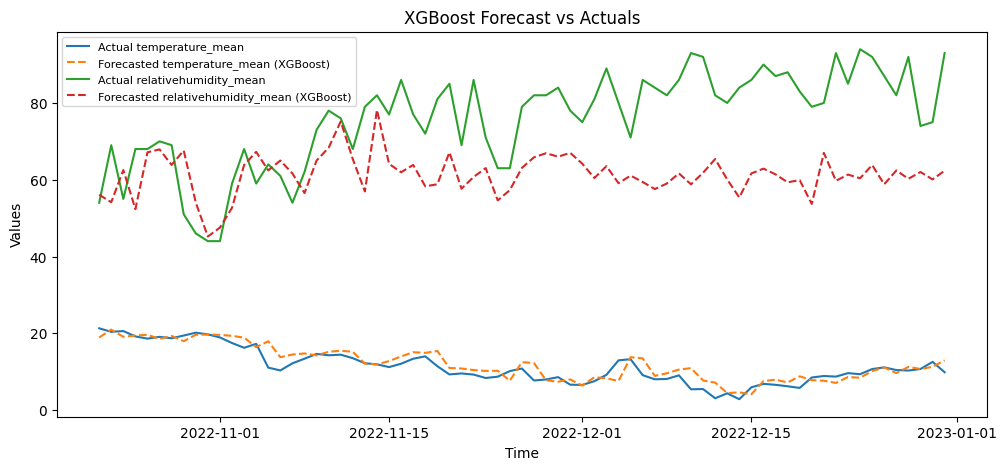

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb

# Assuming 'data' contains the dataset with 'time', 'temperature_mean', and 'relativehumidity_mean' columns

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['temperature_mean', 'relativehumidity_mean']])

# Function to create lag features for XGBoost
def create_lag_features(data, lag):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

# Set lag parameter
lag = 10
X, y = create_lag_features(data_scaled, lag)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape y_train and y_test
y_train = y_train.reshape(-1, 2)
y_test = y_test.reshape(-1, 2)

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

# Train the XGBoost model
xgb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Forecast using the XGBoost model
predictions_xgb = xgb_model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse transform the scaled XGBoost predictions
predictions_xgb_original_scale = scaler.inverse_transform(predictions_xgb)

# Inverse transform the scaled test data to get the original scale
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE) for the XGBoost forecast
mse_xgb = mean_squared_error(y_test_original_scale, predictions_xgb_original_scale)
print(f'Mean Squared Error (MSE) for XGBoost forecast: {mse_xgb}')

# Calculate Root Mean Squared Error (RMSE) for the XGBoost forecast
rmse_xgb = sqrt(mse_xgb)
print(f'Root Mean Squared Error (RMSE) for XGBoost forecast: {rmse_xgb}')

# Plot the results for XGBoost
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(data['time'][-len(y_test):], y_test_original_scale[:, 0], label='Actual temperature_mean')
plt.plot(data['time'][-len(y_test):], predictions_xgb_original_scale[:, 0], label='Forecasted temperature_mean (XGBoost)', linestyle='dashed')
plt.plot(data['time'][-len(y_test):], y_test_original_scale[:, 1], label='Actual relativehumidity_mean')
plt.plot(data['time'][-len(y_test):], predictions_xgb_original_scale[:, 1], label='Forecasted relativehumidity_mean (XGBoost)', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('XGBoost Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


GRU

Epoch 1/50
8/8 [==============================] - 6s 135ms/step - loss: 0.4407 - val_loss: 0.2002
Epoch 2/50
8/8 [==============================] - 0s 21ms/step - loss: 0.1550 - val_loss: 0.0271
Epoch 3/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0514 - val_loss: 0.0057
Epoch 4/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0499 - val_loss: 0.0234
Epoch 5/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0545 - val_loss: 0.0132
Epoch 6/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0415 - val_loss: 0.0034
Epoch 7/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0301 - val_loss: 0.0020
Epoch 8/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0216 - val_loss: 0.0021
Epoch 9/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0155 - val_loss: 0.0024
Epoch 10/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0122 - val_loss: 0.0025
Epoch 11/50
8/8 [===========

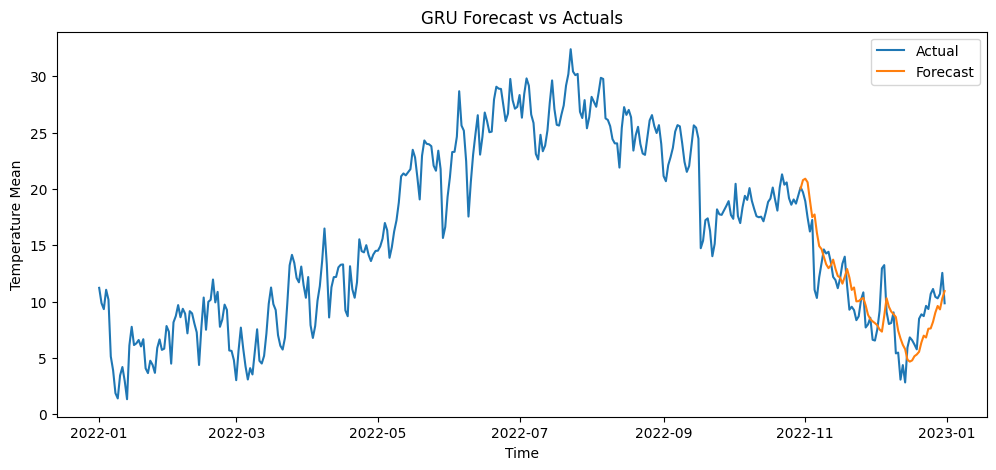

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense


# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Split data into train and test sets (assuming 80% train, 20% test)
train = data.iloc[:int(0.8*len(data))]
test = data.iloc[int(0.8*len(data)):]

# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['temperature_mean', 'relativehumidity_mean']])
test_scaled = scaler.transform(test[['temperature_mean', 'relativehumidity_mean']])

# Prepare data for GRU
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10  # You can adjust this value based on your requirement

X_train, y_train = create_dataset(train_scaled, train_scaled[:, 0], TIME_STEPS)
X_test, y_test = create_dataset(test_scaled, test_scaled[:, 0], TIME_STEPS)

# Build GRU model
model = Sequential()
model.add(GRU(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train GRU model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

# Forecast on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate((y_pred_scaled, X_test[:, -1, 1:]), axis=1))[:, 0]
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(data['time'], data['temperature_mean'], label='Actual')
plt.plot(test['time'].iloc[TIME_STEPS:], y_pred, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Temperature Mean')
plt.title('GRU Forecast vs Actuals')
plt.legend()
plt.show()


Epoch 1/50
8/8 [==============================] - 3s 89ms/step - loss: 0.2234 - val_loss: 0.0897
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0856 - val_loss: 0.0119
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0494 - val_loss: 0.0186
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0446 - val_loss: 0.0094
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0322 - val_loss: 0.0093
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0277 - val_loss: 0.0092
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0231 - val_loss: 0.0077
Epoch 8/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0206 - val_loss: 0.0068
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0195 - val_loss: 0.0071
Epoch 10/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0191 - val_loss: 0.0083
Epoch 11/50
8/8 [============

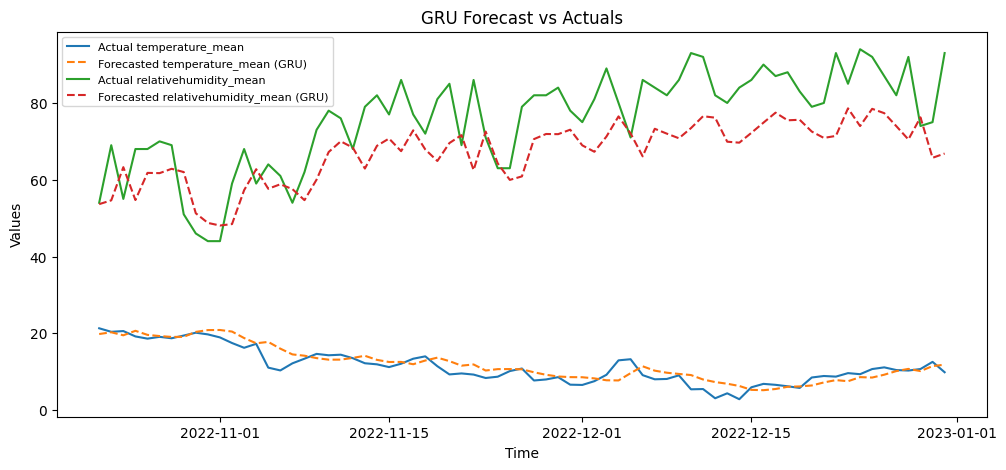

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming 'data' contains the dataset with 'time', 'temperature_mean', and 'relativehumidity_mean' columns

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['temperature_mean', 'relativehumidity_mean']])

# Function to create lag features for GRU
def create_lag_features(data, lag):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

# Set lag parameter
lag = 10
X, y = create_lag_features(data_scaled, lag)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build and compile the GRU model
model = Sequential([
    GRU(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=2)  # Output layer with 2 units for temperature_mean and relativehumidity_mean
])

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the GRU model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Forecast using the GRU model
forecast_steps = len(X_test)
predictions_gru = model.predict(X_test)

# Inverse transform the scaled GRU predictions
predictions_gru_original_scale = scaler.inverse_transform(predictions_gru)

# Inverse transform the scaled test data to get the original scale
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE) for the GRU forecast
mse_gru = mean_squared_error(y_test_original_scale, predictions_gru_original_scale)
print(f'Mean Squared Error (MSE) for GRU forecast: {mse_gru}')

# Calculate Root Mean Squared Error (RMSE) for the GRU forecast
rmse_gru = sqrt(mse_gru)
print(f'Root Mean Squared Error (RMSE) for GRU forecast: {rmse_gru}')

# Plot the results for GRU
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(data['time'][-len(y_test):], y_test_original_scale[:, 0], label='Actual temperature_mean')
plt.plot(data['time'][-len(y_test):], predictions_gru_original_scale[:, 0], label='Forecasted temperature_mean (GRU)', linestyle='dashed')
plt.plot(data['time'][-len(y_test):], y_test_original_scale[:, 1], label='Actual relativehumidity_mean')
plt.plot(data['time'][-len(y_test):], predictions_gru_original_scale[:, 1], label='Forecasted relativehumidity_mean (GRU)', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('GRU Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


LSTM

Epoch 1/50
8/8 [==============================] - 6s 213ms/step - loss: 0.3434 - val_loss: 0.1762
Epoch 2/50
8/8 [==============================] - 0s 35ms/step - loss: 0.1206 - val_loss: 0.0248
Epoch 3/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0235 - val_loss: 0.0127
Epoch 4/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0314 - val_loss: 0.0252
Epoch 5/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0249 - val_loss: 0.0045
Epoch 6/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0142 - val_loss: 0.0039
Epoch 7/50
8/8 [==============================] - 0s 53ms/step - loss: 0.0092 - val_loss: 0.0041
Epoch 8/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0077 - val_loss: 0.0044
Epoch 9/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 10/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 11/50
8/8 [===========

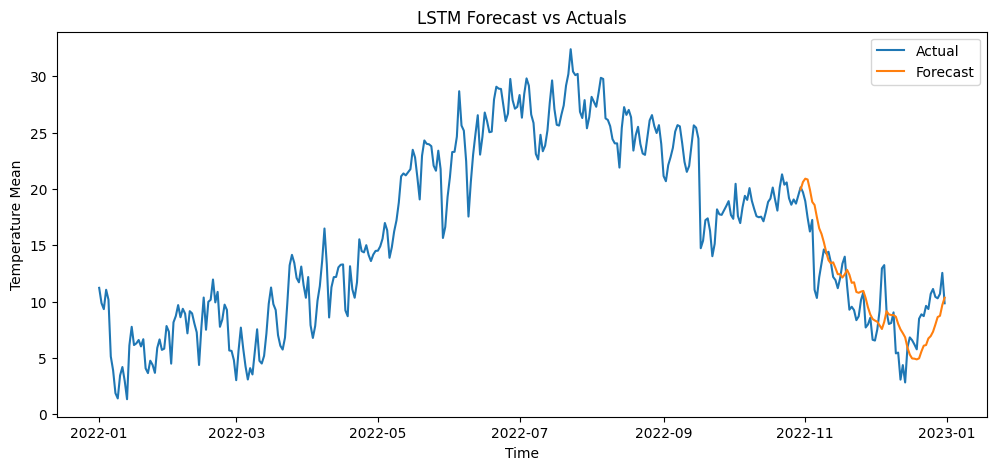

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Split data into train and test sets (assuming 80% train, 20% test)
train = data.iloc[:int(0.8*len(data))]
test = data.iloc[int(0.8*len(data)):]

# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['temperature_mean', 'relativehumidity_mean']])
test_scaled = scaler.transform(test[['temperature_mean', 'relativehumidity_mean']])

# Prepare data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10  # You can adjust this value based on your requirement

X_train, y_train = create_dataset(train_scaled, train_scaled[:, 0], TIME_STEPS)
X_test, y_test = create_dataset(test_scaled, test_scaled[:, 0], TIME_STEPS)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train LSTM model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

# Forecast on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate((y_pred_scaled, X_test[:, -1, 1:]), axis=1))[:, 0]

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(data['time'], data['temperature_mean'], label='Actual')
plt.plot(test['time'].iloc[TIME_STEPS:], y_pred, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Temperature Mean')
plt.title('LSTM Forecast vs Actuals')
plt.legend()
plt.show()


Epoch 1/50
8/8 [==============================] - 7s 161ms/step - loss: 0.1585 - val_loss: 0.0667
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0467 - val_loss: 0.0161
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0387 - val_loss: 0.0128
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0254 - val_loss: 0.0114
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0242 - val_loss: 0.0108
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0220 - val_loss: 0.0077
Epoch 7/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0220 - val_loss: 0.0072
Epoch 8/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0215 - val_loss: 0.0087
Epoch 9/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0212 - val_loss: 0.0088
Epoch 10/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0213 - val_loss: 0.0076
Epoch 11/50
8/8 [===========

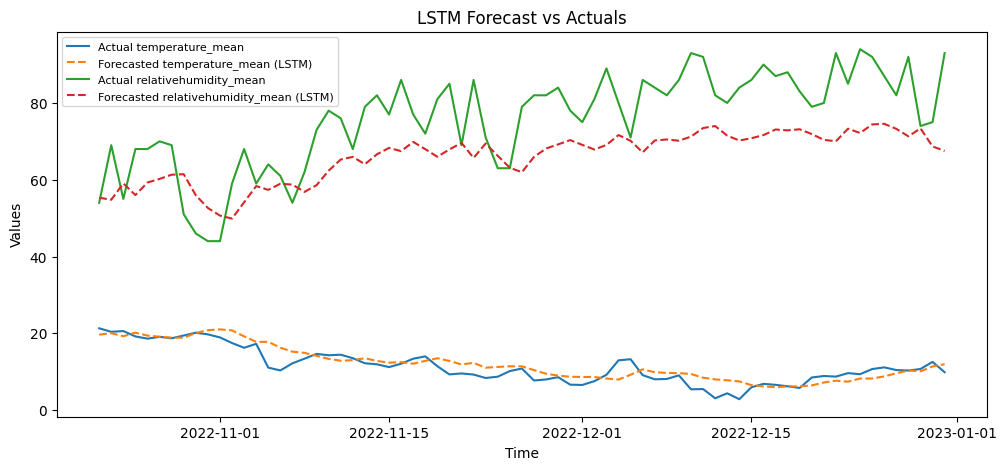

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming 'data' contains the dataset with 'time', 'temperature_mean', and 'relativehumidity_mean' columns

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['temperature_mean', 'relativehumidity_mean']])

# Function to create lag features for LSTM
def create_lag_features(data, lag):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

# Set lag parameter
lag = 10
X, y = create_lag_features(data_scaled, lag)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build and compile the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=2)  # Output layer with 2 units for temperature_mean and relativehumidity_mean
])

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Forecast using the LSTM model
forecast_steps = len(X_test)
predictions_lstm = model.predict(X_test)

# Inverse transform the scaled LSTM predictions
predictions_lstm_original_scale = scaler.inverse_transform(predictions_lstm)

# Inverse transform the scaled test data to get the original scale
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE) for the LSTM forecast
mse_lstm = mean_squared_error(y_test_original_scale, predictions_lstm_original_scale)
print(f'Mean Squared Error (MSE) for LSTM forecast: {mse_lstm}')

# Calculate Root Mean Squared Error (RMSE) for the LSTM forecast
rmse_lstm = sqrt(mse_lstm)
print(f'Root Mean Squared Error (RMSE) for LSTM forecast: {rmse_lstm}')

# Plot the results for LSTM
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(data['time'][-len(y_test):], y_test_original_scale[:, 0], label='Actual temperature_mean')
plt.plot(data['time'][-len(y_test):], predictions_lstm_original_scale[:, 0], label='Forecasted temperature_mean (LSTM)', linestyle='dashed')
plt.plot(data['time'][-len(y_test):], y_test_original_scale[:, 1], label='Actual relativehumidity_mean')
plt.plot(data['time'][-len(y_test):], predictions_lstm_original_scale[:, 1], label='Forecasted relativehumidity_mean (LSTM)', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('LSTM Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Model Performance Comparison

The table below presents a comparison of the performance of five different models based on Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

| Model    | MSE    | RMSE  |
|----------|--------|-------|
| ARIMA    | 63.59  | 7.97  |
| SARIMA   | 39.02  | 6.25  |
| SARIMAX  | 19.72 | 4.44 |
| VAR      | 74.62  | 8.64  |
| LSTM     | 92.59 | 9.62 |
| GRU      |73.74 | 8.58 |
| XGBoost  | 177.56 | 13.32 |


we are summarising the performance of different models as follows:


SARIMAX:

MSE: 19.72
RMSE: 4.44
SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous variables) is an extension of SARIMA that includes the ability to incorporate exogenous variables (external factors that can affect the time series).
By incorporating exogenous variables, SARIMAX can capture additional information that might influence the weather, such as humidity, wind speed, or atmospheric pressure.
The low MSE and RMSE values indicate that SARIMAX provides a good fit to your weather dataset, capturing its underlying patterns and dynamics effectively.


SARIMA:

MSE: 39.02
RMSE: 6.25
SARIMA (Seasonal Autoregressive Integrated Moving Average) is a time series forecasting model that captures the temporal dependencies and seasonality in the data.
Although SARIMA doesn't incorporate exogenous variables like SARIMAX, it performs remarkably well on its own.
The relatively low MSE and RMSE values suggest that SARIMA can adequately model the patterns and variations in your weather data, even without considering external factors.

In summary, while LSTM and GRU are advanced models that can understand complicated patterns over time, they might not be the best fit for this weather forecasting task. This is because they are complex and need lots of data to work well and as we know our dataset is not so large, hence they seem to overfit.

On the other hand, SARIMAX and SARIMA are simpler models that still do a good job at forecasting weather. They are easier to understand and work with, and they also gave good results in our tests. So, for this weather forecasting task, the simpler models are better choices.

Future Enhancements:

1. Conduct hyperparameter tuning and feature engineering to optimize model performance.
2. Utilize regularization, more ensemble methods, and cross-validation for improved robustness and generalization.

References
https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting
https://www.statsmodels.org/stable/api.html#multivariate-time-series-models
https://colab.research.google.com/drive/1tGj8V6y_3rqdPt9K16KsemIO2yeYY4X3?usp=sharing
https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb

https://www.kaggle.com/code/kanncaa1/time-series-prediction-tutorial-with-eda

https://medium.com/@ooemma83/how-to-interpret-acf-and-pacf-plots-for-identifying-ar-ma-arma-or-arima-models-498717e815b6
https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c